## 4.2 線形回帰モデルと回帰係数

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(42)
warnings.simplefilter('ignore')

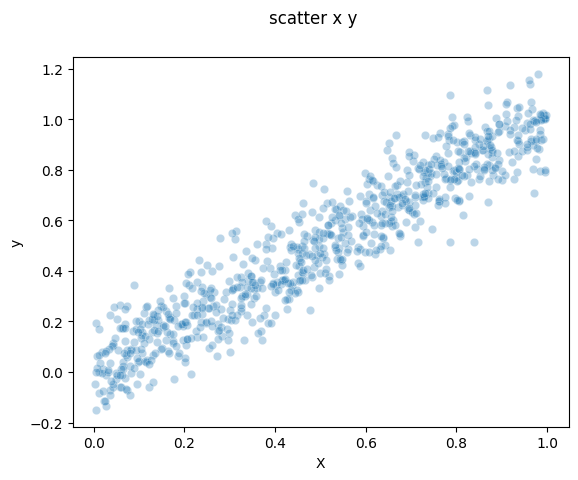

In [2]:
from util import generate_simulation_data, plot_scatter

X_train, X_test, y_train, y_test = generate_simulation_data(simulation=1)
plot_scatter(X_train[:,0], y_train, title="scatter x y")

In [3]:
from sklearn.linear_model import LinearRegression
from util import regression_metrics

lm = LinearRegression().fit(X_train, y_train)

regression_metrics(lm, X_test, y_test)

,RMSE,R2
0,0.097416,0.899146


In [4]:
from util import get_coef

df_coef = get_coef(lm, ["X"])
df_coef.T

,intercept,X
coef,-0.000411,1.00587


## 4.2.2 非線形の場合


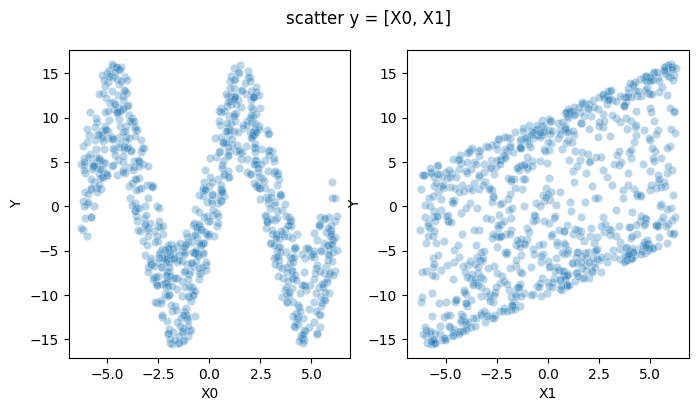

In [5]:
from util import plot_scatters

X_train, X_test, y_train, y_test = generate_simulation_data(simulation=2)
plot_scatters(X_train, y_train, ["X0", "X1"], title="scatter y = [X0, X1]")

In [6]:
lm = LinearRegression().fit(X_train, y_train)
regression_metrics(lm, X_test, y_test)

,RMSE,R2
0,6.677425,0.340576


In [7]:
df_coef = get_coef(lm, ["X0", "X1"])
df_coef.T

,intercept,X0,X1
coef,-0.000402,-0.716324,1.004684


In [8]:
# 非線形に対応すべくランダムフォレストを使う
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1, random_state=42).fit(X_train, y_train)
regression_metrics(rf, X_test, y_test)

,RMSE,R2
0,0.763247,0.991385


## 4.3 Partial Dependence

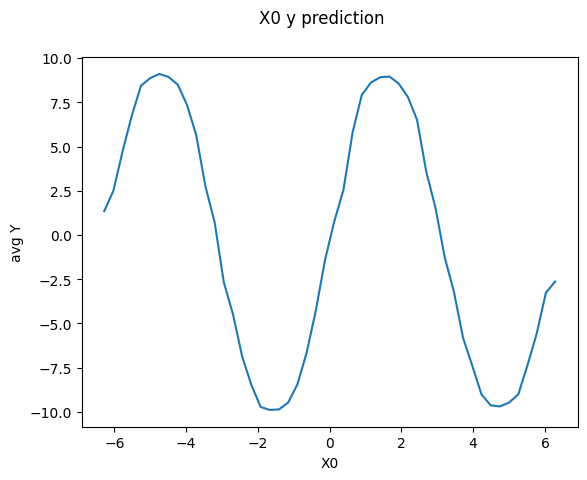

In [9]:
from util import counter_factual_prediction, plot_line

X0_range = np.linspace(2*-np.pi, 2*np.pi, num=50)

avg_cps = np.array(
    [counter_factual_prediction(rf, X_test, 0, x).mean() for x in X0_range]
)

plot_line(
    X0_range, avg_cps, "X0", "avg Y", "X0 y prediction"
)

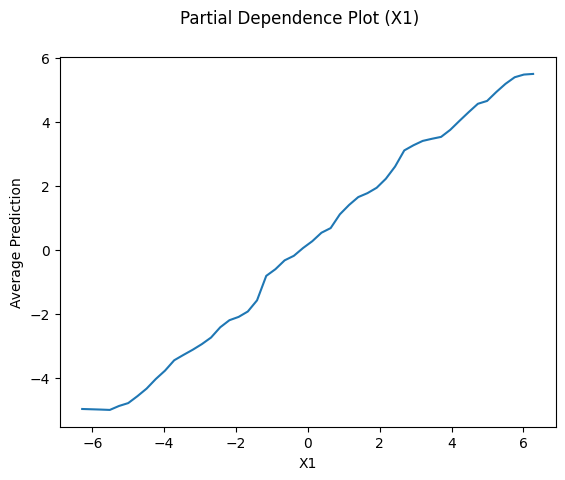

In [10]:
# X1は自作のクラスで分析してみる
from PD import PartialDependence

pdp = PartialDependence(rf, X_test, ["X0", "X1"])
pdp.partial_dependence("X1")
pdp.plot()

## 4.4 PDは因果関係として解釈できるのか

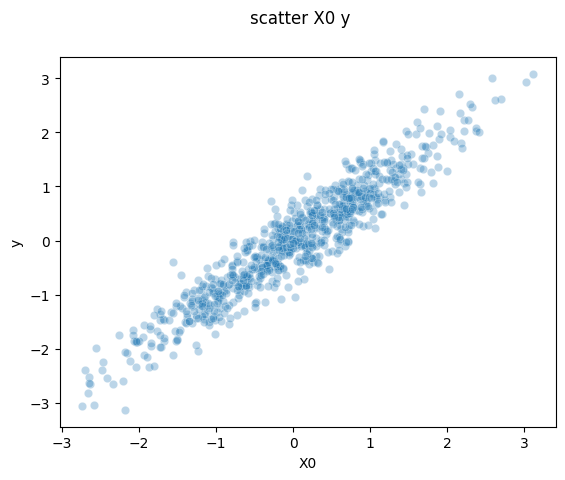

In [11]:
X_train, X_test, y_train, y_test = generate_simulation_data(simulation=3)
plot_scatter(X_train[:,0], y_train, xlabel="X0", title="scatter X0 y")

In [12]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42).fit(X_train, y_train)
regression_metrics(rf, X_test, y_test)

,RMSE,R2
0,0.115743,0.98874


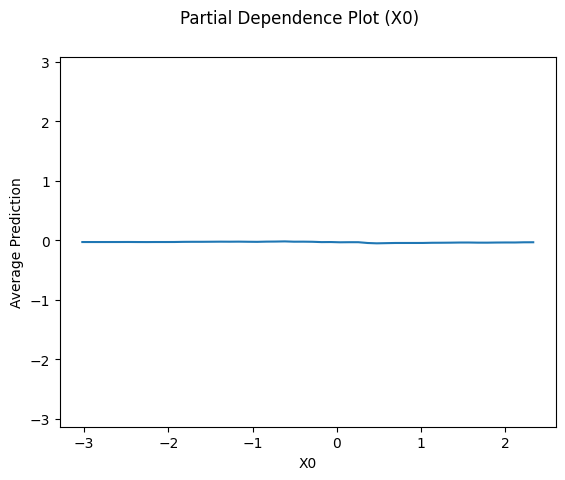

In [13]:
pdp = PartialDependence(rf, X_test, ["X0", "X1"])
pdp.partial_dependence("X0", n_grid=50)
pdp.plot(ylim=(y_train.min(), y_train.max()))

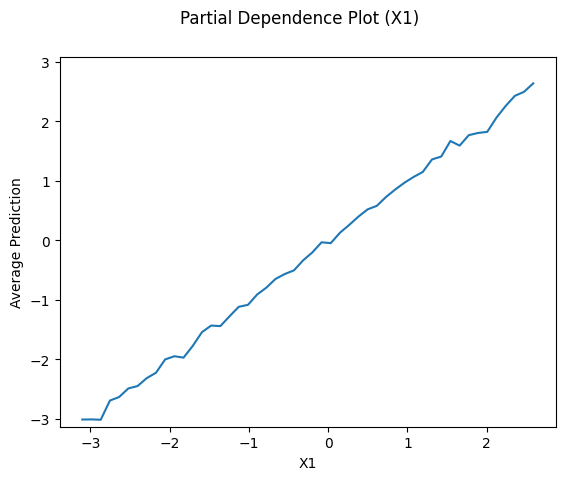

In [14]:
pdp.partial_dependence("X1", n_grid=50)
pdp.plot(ylim=(y_train.min(), y_train.max()))

## PDを因果関係として解釈する危険性

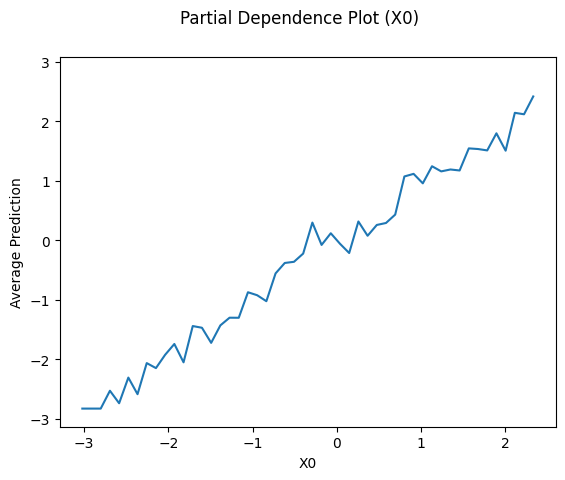

In [16]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train[:,[0]], y_train)

pdp = PartialDependence(rf, X_test[:,[0]], ["X0"])
pdp.partial_dependence("X0", n_grid=50)
pdp.plot(ylim=(y_train.min(), y_train.max()))

In [17]:
regression_metrics(rf, X_test[:,[0]], y_test)

,RMSE,R2
0,0.399206,0.866047


In [18]:
# モデルが特徴量と目的変数の関係を正しく学習できていることを判別するのは非常に困難